In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### MLP su dataset 'diabetes' (regressione)

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [5]:
X.shape

(442, 10)

In [46]:
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(16, input_dim=10, activation= "relu"))
model.add(Dense(10, activation= "relu"))
model.add(Dense(1, activation= "relu"))

In [47]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
31/31 [==============================] - 0s 2ms/step - loss: 30028.6504 - mean_squared_error: 30028.6504
Epoch 2/200
31/31 [==============================] - 0s 1ms/step - loss: 29973.0332 - mean_squared_error: 29973.0332
Epoch 3/200
31/31 [==============================] - 0s 1ms/step - loss: 29795.3047 - mean_squared_error: 29795.3047
Epoch 4/200
31/31 [==============================] - 0s 1ms/step - loss: 29508.9414 - mean_squared_error: 29508.9414
Epoch 5/200
31/31 [==============================] - 0s 1ms/step - loss: 29045.1777 - mean_squared_error: 29045.1777
Epoch 6/200
31/31 [==============================] - 0s 1ms/step - loss: 28269.6992 - mean_squared_error: 28269.6992
Epoch 7/200
31/31 [==============================] - 0s 1ms/step - loss: 27087.5176 - mean_squared_error: 27087.5176
Epoch 8/200
31/31 [==============================] - 0s 1ms/step - loss: 25461.7383 - mean_squared_error: 25461.7383
Epoch 9/200
31/31 [==============================] - 0s 1ms/step

31/31 [==============================] - 0s 1ms/step - loss: 2920.7563 - mean_squared_error: 2920.7563
Epoch 72/200
31/31 [==============================] - 0s 1ms/step - loss: 2911.0449 - mean_squared_error: 2911.0449
Epoch 73/200
31/31 [==============================] - 0s 1ms/step - loss: 2911.8838 - mean_squared_error: 2911.8838
Epoch 74/200
31/31 [==============================] - 0s 1ms/step - loss: 2916.9221 - mean_squared_error: 2916.9221
Epoch 75/200
31/31 [==============================] - 0s 1ms/step - loss: 2895.4204 - mean_squared_error: 2895.4204
Epoch 76/200
31/31 [==============================] - 0s 1ms/step - loss: 2883.6233 - mean_squared_error: 2883.6233
Epoch 77/200
31/31 [==============================] - 0s 1ms/step - loss: 2882.8547 - mean_squared_error: 2882.8547
Epoch 78/200
31/31 [==============================] - 0s 1ms/step - loss: 2869.5017 - mean_squared_error: 2869.5017
Epoch 79/200
31/31 [==============================] - 0s 1ms/step - loss: 2871.0076 -

31/31 [==============================] - 0s 1ms/step - loss: 2716.1531 - mean_squared_error: 2716.1531
Epoch 142/200
31/31 [==============================] - 0s 1ms/step - loss: 2710.5366 - mean_squared_error: 2710.5366
Epoch 143/200
31/31 [==============================] - 0s 1ms/step - loss: 2703.7107 - mean_squared_error: 2703.7107
Epoch 144/200
31/31 [==============================] - 0s 1ms/step - loss: 2702.6880 - mean_squared_error: 2702.6880
Epoch 145/200
31/31 [==============================] - 0s 1ms/step - loss: 2696.3801 - mean_squared_error: 2696.3801
Epoch 146/200
31/31 [==============================] - 0s 1ms/step - loss: 2702.6509 - mean_squared_error: 2702.6509
Epoch 147/200
31/31 [==============================] - 0s 1ms/step - loss: 2695.5178 - mean_squared_error: 2695.5178
Epoch 148/200
31/31 [==============================] - 0s 1ms/step - loss: 2693.0054 - mean_squared_error: 2693.0054
Epoch 149/200
31/31 [==============================] - 0s 1ms/step - loss: 269

In [49]:
from sklearn.metrics import mean_squared_error

pred= model.predict(X_test)
print(mean_squared_error(y_test,pred)) 

2813.725186005003


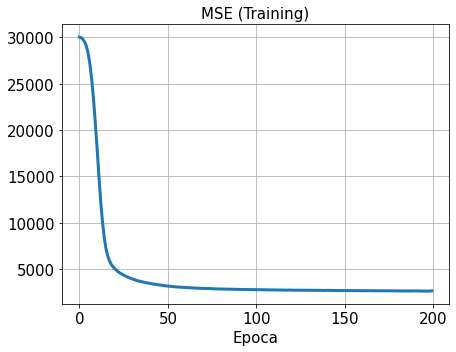

In [50]:
hist = history.history

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['mean_squared_error'], lw=3)
ax.set_title('MSE (Training)', size=15)
ax.set_xlabel('Epoca', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.tight_layout()

plt.show()

### MLP su dataset Obesity (multiclasse)

In [132]:
import pandas as pd
df = pd.read_csv('./ObesityDataSet_raw.csv', sep=',')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [133]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC',
   'CALC', 'MTRANS','NObeyesdad']] = df[['Gender', 'family_history_with_overweight', 'FAVC',
                      'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']].apply(lambda col: le.fit_transform(col))

In [135]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=1)

In [152]:
X_train.shape

(1477, 16)

In [203]:
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(32, input_shape=(16,) , activation='sigmoid')) 
model.add(Dense(16, activation='sigmoid')) 
model.add(Dense(7, activation='softmax'))

In [204]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_119 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_120 (Dense)            (None, 7)                 119       
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________


In [205]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
148/148 [==============================] - 0s 1ms/step - loss: 1.9555 - accuracy: 0.1517
Epoch 2/100
148/148 [==============================] - 0s 1ms/step - loss: 1.8198 - accuracy: 0.3575
Epoch 3/100
148/148 [==============================] - 0s 1ms/step - loss: 1.6679 - accuracy: 0.4523
Epoch 4/100
148/148 [==============================] - 0s 1ms/step - loss: 1.5004 - accuracy: 0.5058
Epoch 5/100
148/148 [==============================] - 0s 1ms/step - loss: 1.3519 - accuracy: 0.5552
Epoch 6/100
148/148 [==============================] - 0s 1ms/step - loss: 1.2342 - accuracy: 0.5768
Epoch 7/100
148/148 [==============================] - 0s 1ms/step - loss: 1.1411 - accuracy: 0.6276
Epoch 8/100
148/148 [==============================] - 0s 1ms/step - loss: 1.0669 - accuracy: 0.6588
Epoch 9/100
148/148 [==============================] - 0s 1ms/step - loss: 1.0042 - accuracy: 0.6608
Epoch 10/100
148/148 [==============================] - 0s 1ms/step - loss: 0.9469 - accura

148/148 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9898
Epoch 81/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9919
Epoch 82/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9926
Epoch 83/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9939
Epoch 84/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9932
Epoch 85/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9932
Epoch 86/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9953
Epoch 87/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9932
Epoch 88/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9953
Epoch 89/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 

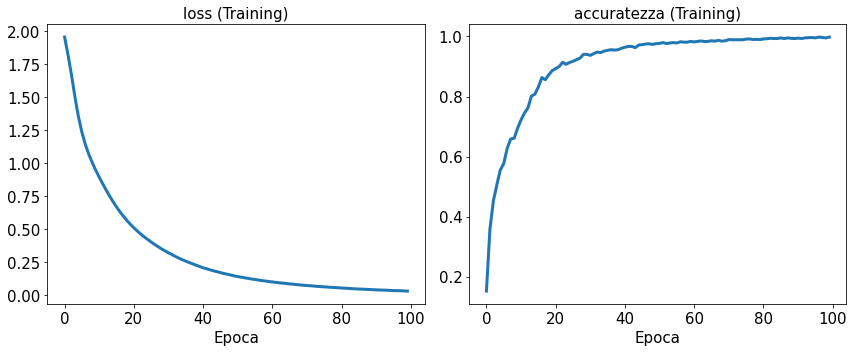

In [206]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('loss (Training)', size=15)
ax.set_xlabel('Epoca', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('accuratezza (Training)', size=15)
ax.set_xlabel('Epoca', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

In [207]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

Test loss: 0.1167   Test Acc.: 0.9606


### MLP su dataset breast cancer

In [51]:
from sklearn import datasets

data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [52]:
X.shape

(569, 30)

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=1)

In [84]:
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(30, input_shape=(30,) , activation='sigmoid')) 
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8543
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9095
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.9271
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9372
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.9447
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9472
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9497
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9497
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.9523
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9523
Epoch 11/

40/40 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9874
Epoch 84/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9899
Epoch 85/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9899
Epoch 86/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9899
Epoch 87/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9874
Epoch 88/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9874
Epoch 89/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9874
Epoch 90/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9874
Epoch 91/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9899
Epoch 92/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9899
Epoch 93/100


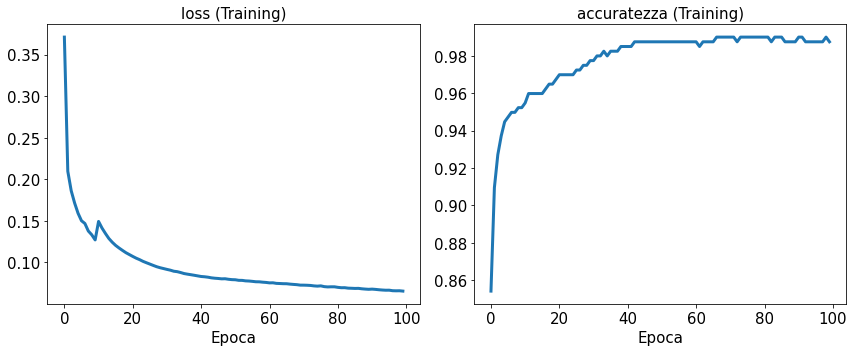

In [87]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('loss (Training)', size=15)
ax.set_xlabel('Epoca', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('accuratezza (Training)', size=15)
ax.set_xlabel('Epoca', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))